Import Libraries

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix

Load Dataset

In [94]:
df = pd.read_csv("classification dataset.csv")

In [95]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,department,risk_level,shift,region
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,High,Morning,South
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,NaN,Evening,North
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,A,High,Morning,West
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,B,NaN,Night,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,NaN,Night,West


In [96]:
# check null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                   48
texture_se                   0
perimeter_se                19
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                 66
fractal_dimension_se        68
radius_worst                 0
texture_worst                0
perimeter_worst             59
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
departme

Fill missing values

In [97]:
numeric_cols_with_missing = df.select_dtypes(include=['number']).columns[df.select_dtypes(include=['number']).isnull().any()].tolist()

numeric_cols_with_missing

['radius_se',
 'perimeter_se',
 'symmetry_se',
 'fractal_dimension_se',
 'perimeter_worst']

In [98]:
catg_cols_with_missing = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).isnull().any()].tolist()

catg_cols_with_missing

['department', 'risk_level', 'shift', 'region']

In [99]:
num_impute = SimpleImputer(strategy='median')
catg_impute = SimpleImputer(strategy='most_frequent')

In [100]:
# fill missing values in numeric columns
for col in numeric_cols_with_missing:
    df[col] = num_impute.fit_transform(df[[col]])

In [101]:
# fill missing values in categorical columns
for col in catg_cols_with_missing:
    df[col] = catg_impute.fit_transform(df[[col]]).ravel() 

In [102]:
# check null values after impute
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
department                 0
risk_level                 0
shift         

In [103]:
# check if there duplicates or not
print(f'Duplicates in dataset = {df.duplicated().sum()}')

Duplicates in dataset = 0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [105]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,106.458533,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,32.167657,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,85.510000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.745000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,120.300000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Encode Catg cols

In [106]:
catg_cols = df.select_dtypes(include='object').columns.to_list()
catg_cols

['diagnosis', 'department', 'risk_level', 'shift', 'region']

In [107]:
# ['diagnosis', -> Label Encode
# 'department', -> Label Encode
# 'risk_level', -> Ordinal Encode
# 'shift', -> Label Encode
# 'region' -> Label Encode
# ]

In [108]:
l_encoder = LabelEncoder()
od_encoder = OrdinalEncoder()

In [109]:
for col in ['diagnosis', 'department', 'shift', 'region']:
    df[col] = l_encoder.fit_transform(df[col])

In [110]:
df['risk_level'] = od_encoder.fit_transform(df[['risk_level']])

In [111]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,department,risk_level,shift,region
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,2,0.0,1,2
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2,0.0,0,1
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,0.0,1,3
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,0.0,2,2
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,2,0.0,2,3


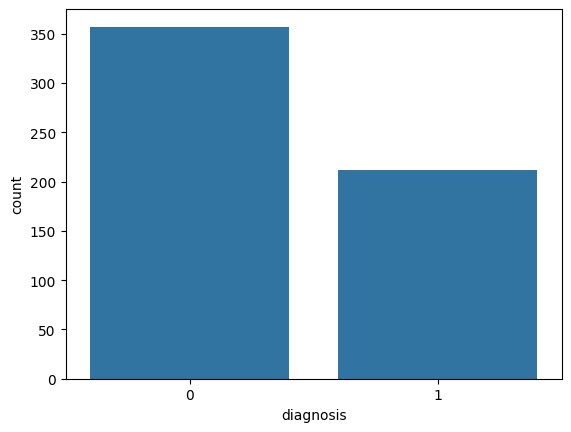

In [112]:
# check if imbalanced or not
sns.countplot(df,x='diagnosis')
plt.show()

Data Split Process

In [113]:
X = df.drop(columns=['id','diagnosis'] , axis=1)
y = df[['diagnosis']]

In [114]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,department,risk_level,shift,region
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,2,0.0,1,2
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2,0.0,0,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,0.0,1,3
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,0.0,2,2
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,2,0.0,2,3


In [115]:
y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [116]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Create KNN model

In [117]:
knn_model = KNeighborsClassifier()

In [118]:
# train model with data
knn_model.fit(X_train,y_train)

c:\Users\Bassam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [119]:
# make predictions
knn_pred = knn_model.predict(X_test)

Create Naive Bayes model

In [120]:
gnb = GaussianNB()

In [121]:
# train model with data
gnb.fit(X_train,y_train)

c:\Users\Bassam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,priors,None
,var_smoothing,1e-09


In [122]:
# make predictions
gnb_pred = gnb.predict(X_test)

Evaluate the 2 models

In [123]:
print(f'Accuracy_score of KNN model = {accuracy_score(y_test , knn_pred) * 100 :.2f}%')
print(f'Accuracy_score of Naive Bayes model = {accuracy_score(y_test , gnb_pred) * 100:.2f}%')

Accuracy_score of KNN model = 95.61%
Accuracy_score of Naive Bayes model = 97.37%


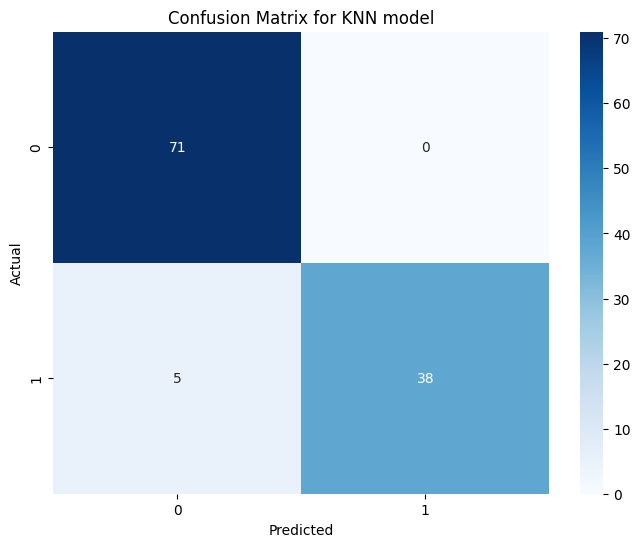

In [124]:
cm = confusion_matrix(y_test, knn_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN model')
plt.show()

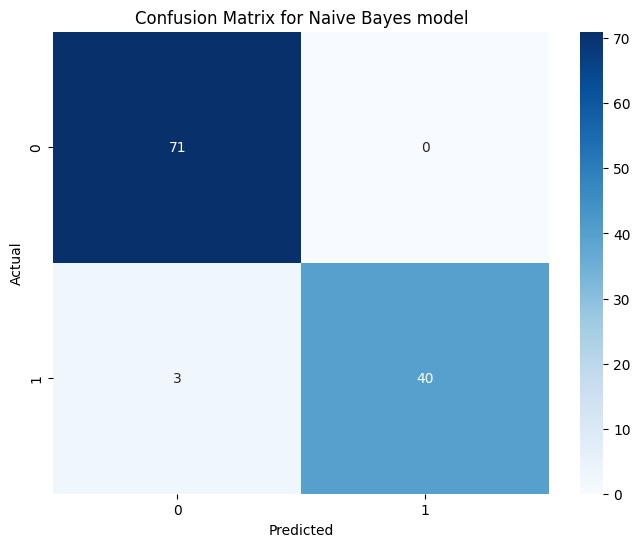

In [125]:
cm = confusion_matrix(y_test, gnb_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes model')
plt.show()